# LAB 9

### Try ANN on "Fruits" dataset. Modify number of layers and observe the performance difference: 
### https://www.kaggle.com/moltean/fruits

### Or (In a case if you don't have that much dataPack available, download 20 images of apple and 20 images of orange from the internet and work on it with RANDOM state=Rollnumber stratergy, 80-20% training-testing division)

In [2]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

In [3]:
# Load Data Directory
data_dir = '/home/nihar/Desktop/SEM 7/ML/Lab/Lab9/sample-fruits-360'

In [4]:
# Function for load images
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

In [5]:
# Load Dataset
x, y, target_labels = load_dataset(data_dir)
print("Dataset Loaded !")

# Get Trainning size and Test size 
print('Total set size : ',x.shape)
print('Total targets : ',len(target_labels) )

Dataset Loaded !
Total set size :  (975,)
Total targets :  65


In [6]:
# Function for convert image to array
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(keras.preprocessing.image.img_to_array(keras.preprocessing.image.load_img(file)))
    return images_as_array

# Convert images to numpy array using keras.preprocessing library
x = np.array(convert_image_to_array(x),np.float32)
print(x.shape)

(975, 100, 100, 3)


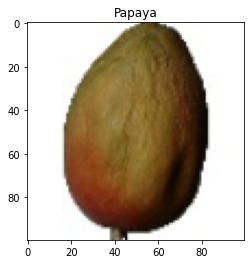

In [7]:
# Plot image on random data
plt.imshow(x[2]/255)
plt.title(target_labels[y[2]])
plt.show()

In [8]:
# Flatten the features of image
x = x.reshape([-1,100*100*3])
x = x/255
print("final shape : " , x.shape)

final shape :  (975, 30000)


In [9]:
# Train and Test split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=129)

# Get size of all set
print("X Train size : ", X_train.shape)
print("X Test size : ", X_test.shape)
print("Y Train size : ", y_train.shape)
print("Y Test size : ", y_test.shape)

X Train size :  (780, 30000)
X Test size :  (195, 30000)
Y Train size :  (780,)
Y Test size :  (195,)


In [10]:
# Convert numpy array to torch
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

In [11]:
# Define no of iteration, batch size, num_epochs
batch_size=100
n_iters = 1000
num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

In [12]:
# Set train and test
train = torch.utils.data.TensorDataset(X_train,y_train)
test = torch.utils.data.TensorDataset(X_test,y_test)
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

### ANN model for 3 hidden layer

In [13]:
# Create ANN Model with 3 hidden layer
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_dim,hidden_dim)
        self.tanh2 = nn.Tanh()
        
        self.fc3 = nn.Linear(hidden_dim,hidden_dim)
        self.tanh3 = nn.Tanh()
        
        self.fc4 = nn.Linear(hidden_dim,hidden_dim)
        self.relu4 = nn.ReLU() 
        
        self.fc5 =  nn.Linear(hidden_dim,output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        
        out = self.fc2(out)
        out = self.tanh2(out)
        
        out = self.fc3(out)
        out = self.tanh3(out)
        
        out = self.fc4(out)
        out = self.relu4(out)

        out = self.fc5(out)
        return out

In [14]:
# Initialize Parameters and fit the model
input_dim = 100*100*3
hidden_dim = 300
output_dim = len(target_labels)

model = ANNModel(input_dim, hidden_dim, output_dim)
error = nn.CrossEntropyLoss()
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [15]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 100*100*3))
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs,labels)
        loss.backward()
        optimizer.step()
        count += 1
        
        if count % 5 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(-1, 100*100*3))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / float(total)
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

            if count % 50 == 0:
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 50  Loss: 4.083984851837158  Accuracy: 8.717948913574219 %
Iteration: 100  Loss: 3.9549901485443115  Accuracy: 14.35897445678711 %
Iteration: 150  Loss: 3.709347724914551  Accuracy: 14.35897445678711 %
Iteration: 200  Loss: 3.332343339920044  Accuracy: 11.79487133026123 %
Iteration: 250  Loss: 2.8798470497131348  Accuracy: 21.0256404876709 %
Iteration: 300  Loss: 2.5983495712280273  Accuracy: 25.128204345703125 %
Iteration: 350  Loss: 2.064899206161499  Accuracy: 45.128204345703125 %
Iteration: 400  Loss: 1.653940200805664  Accuracy: 62.0512809753418 %
Iteration: 450  Loss: 1.3524326086044312  Accuracy: 77.43589782714844 %
Iteration: 500  Loss: 1.065871000289917  Accuracy: 89.74359130859375 %
Iteration: 550  Loss: 0.8575260043144226  Accuracy: 92.30769348144531 %
Iteration: 600  Loss: 0.6434721350669861  Accuracy: 95.8974380493164 %
Iteration: 650  Loss: 0.4945589303970337  Accuracy: 94.87179565429688 %
Iteration: 700  Loss: 0.44498035311698914  Accuracy: 95.8974380493164 %


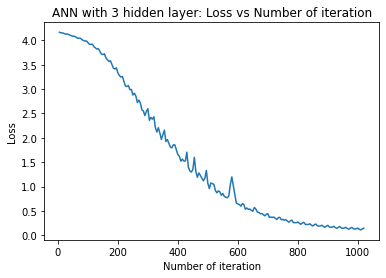

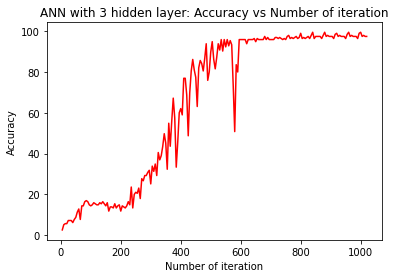

In [16]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN with 3 hidden layer: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN with 3 hidden layer: Accuracy vs Number of iteration")
plt.show()

### ANN model for 5 hidden layer

In [17]:
# Create ANN Model with 5 hidden layer 
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_dim,hidden_dim)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(hidden_dim,hidden_dim)
        self.tanh3 = nn.Tanh()
        
        self.fc4 = nn.Linear(hidden_dim,hidden_dim)
        self.tanh4 = nn.Tanh() 
         
        self.fc5 = nn.Linear(hidden_dim,hidden_dim)
        self.tanh5 = nn.Tanh() 
         
        self.fc6 = nn.Linear(hidden_dim,hidden_dim)
        self.relu6 = nn.ReLU() 
        
        self.fc7 =  nn.Linear(hidden_dim,output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        
        out = self.fc2(out)
        out = self.relu2(out)
        
        out = self.fc3(out)
        out = self.tanh3(out)
        
        out = self.fc4(out)
        out = self.tanh4(out)
        
        out = self.fc5(out)
        out = self.tanh5(out)
        
        out = self.fc6(out)
        out = self.relu6(out)

        out = self.fc7(out)
        return out

In [18]:
# Initialize Parameters and fit the model
input_dim = 100*100*3
hidden_dim = 300
output_dim = len(target_labels)

model = ANNModel(input_dim, hidden_dim, output_dim)
error = nn.CrossEntropyLoss()
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [19]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 100*100*3))
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs,labels)
        loss.backward()
        optimizer.step()
        count += 1
        
        if count % 5 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(-1, 100*100*3))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / float(total)
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

            if count % 50 == 0:
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 50  Loss: 4.165599822998047  Accuracy: 1.0256410837173462 %
Iteration: 100  Loss: 4.163886547088623  Accuracy: 2.0512821674346924 %
Iteration: 150  Loss: 4.1551947593688965  Accuracy: 3.076923131942749 %
Iteration: 200  Loss: 4.134066581726074  Accuracy: 5.641025543212891 %
Iteration: 250  Loss: 4.112189769744873  Accuracy: 8.20512866973877 %
Iteration: 300  Loss: 4.082331657409668  Accuracy: 9.230769157409668 %
Iteration: 350  Loss: 4.024580001831055  Accuracy: 6.666666507720947 %
Iteration: 400  Loss: 3.863083600997925  Accuracy: 5.641025543212891 %
Iteration: 450  Loss: 3.6305315494537354  Accuracy: 6.153846263885498 %
Iteration: 500  Loss: 3.315159797668457  Accuracy: 6.153846263885498 %
Iteration: 550  Loss: 3.276829719543457  Accuracy: 9.743589401245117 %
Iteration: 600  Loss: 2.7489805221557617  Accuracy: 9.230769157409668 %
Iteration: 650  Loss: 2.180283546447754  Accuracy: 29.230770111083984 %
Iteration: 700  Loss: 1.9756776094436646  Accuracy: 43.589744567871094 %


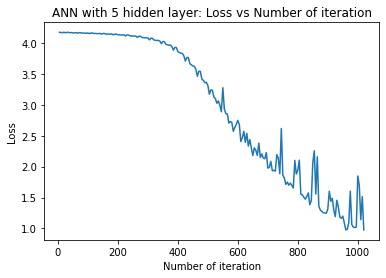

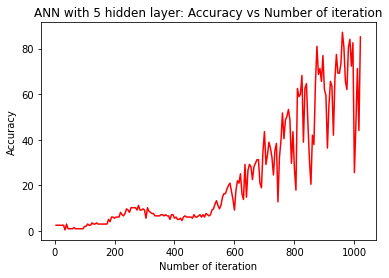

In [20]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN with 5 hidden layer: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN with 5 hidden layer: Accuracy vs Number of iteration")
plt.show()

#### Increase number of layers in ANN , keeping other all parameteres as it is, it performs with less accuracy and degrade the performance of model in my case.